# EPA1333 - Computer Engineering for Scientific Computing
## Week 5 - Oct 5, 2016

**Python Data Science Handbook**

*Jake VanderPlas*

In [ ]:
from IPython.core.display import Image
Image('https://covers.oreillystatic.com/images/0636920034919/lrg.jpg')

## Matplotlib 

Drawing plots, barchart. Some interaction is possible too.

Documentation: 
  * http://matplotlib.org/
  * [Beginners Guide](http://matplotlib.org/users/beginner.html)
  * [Examples](http://matplotlib.org/users/screenshots.html)
  * [scipy-lectures](http://www.scipy-lectures.org/intro/matplotlib/matplotlib.html)
 
 
  

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Optional, use a nice style of graphs
plt.style.use('ggplot')


In [ ]:
# plt.plot is the basic command
# plt.plot( X-axis, Y-axis, options... )

x = np.arange(-10,11)
y = x * x

plt.plot( x, y )

In [1]:
# Plotting multiple graphs in one plot

x = np.arange(-3,3,0.0001)

ya = np.sin(x-2*np.sin(x))+1

yb1 = np.sin(x)
yb2 = np.cos(x*x)

yc = np.cos(np.abs(x))

# Plot multiple graphs
plt.plot( x, ya, color='blue', linestyle='-', label='Solid')
plt.plot( x, yb1, color='red', linestyle=':', label ='Dotted')
plt.plot( x, yb2, color='green', linestyle='-.', label='Dashdot')
plt.plot( x, yc, color='grey', linestyle='--', label='Dashed')

# Show a legend
plt.legend()

# Plot labels for X and Y axis
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

# Plot a title
plt.title("Plot with multiple graphs.")

NameError: name 'np' is not defined

### Generic view of matplotlib

A plot in matplotlib looks like this:

![matplotlib](matplotlib-figure.png)


In [ ]:
# Creating 2 plots side by side: subplots.

# Create a figure and 2 axes (each will contain a plot)
# The plots will be placed in a 1x2 grid (next to each other)
fig, (ax1, ax2) = plt.subplots( 1, 2 )


x=list(range(1,10))
y1 = [ 2*y for y in x ]
y2 = [ 1/y for y in x ]

# Plot each graph. The final argument is a short-cut for color, linestyle and markers.
ax1.plot( x, y1, "b-o")
ax2.plot( x, y2, "r-o")

# In Jupyter Notebook with matplotlib inline, plt.show() is not necessary
plt.show()

## Example: Hares, Lynx, Carrot

The file *population.txt* contains the populations over the years of
hares, lynxes and carrots.

  * What is the mean of the populations over the years?
  * In which year was the highest population for each species?
  * Which years have a population > 50,000 for any species?
 

In [ ]:
# A quick look into the file
# !type data\populations.txt # use for Winfows
!cat data/populations.txt    # use for Mac/Linux

In [ ]:
# Read the file into an array using np.loadtxt()
population = np.loadtxt('data/populations.txt')
population

In [ ]:
# Get the transposition of the matrix, to get each column separately.
years, hares, lynxes, carrots = population.T
print( years )
print( hares )

In [ ]:
# Quickly plot them
plt.plot( years, hares, color='green', label='Hares')
plt.plot( years, lynxes, color='red', label='Lynxes')
plt.plot( years, carrots, color='orange', label='Carrots')

plt.legend(loc=((1.05,0.72)))

In [ ]:
# Print the mean of the species, over the years
# Skip the first column (years)
population[:,1:].mean(axis=0)

In [ ]:
# Find the year in which the species was highest.
year_highest_species = population.argmax(axis=0)
year_highest_species

In [ ]:
print("Highest Hare ", years[year_highest_species[1]], hares[year_highest_species[1]])
print("Highest Lynx ", years[year_highest_species[2]], lynxes[year_highest_species[2]])
print("Highest Carrot ", years[year_highest_species[3]], carrots[year_highest_species[3]])

In [ ]:
above50000 = np.any(population[:,1:] > 50000, axis=1)
print(years[above50000])
population[above50000]


### Interactive plots

We can make a variable interactive which we can use to make graphs interactive too.

In [ ]:
from ipywidgets import interact

In [ ]:
# You can make a function's argument interactive like this

def f(x):
    return x
    
interact(f, x=10)

In [ ]:
# Another way is to use the @ sign.

@interact(x=10)
def f(x):
    return x

In [ ]:
# Let's use this to make a plot interactive

@interact(a=(-10.0,10.0,0.5))
def h(a):
    l = [ x*x*a - a*x for x in range(-20,20)]
    plt.plot( l )

In [ ]:
@interact(x=10, y=20)
def h( x, y ):
    plt.axis( [-x,x,-y,y] )   # Set the limits of the axis
    plt.plot( [i for i in range(-10,10)],[ i*i for i in range(-10,10)])

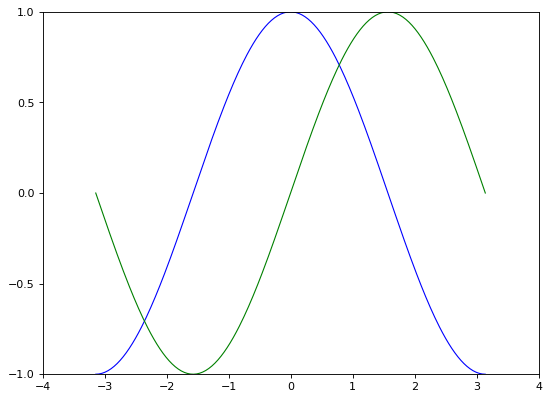

In [1]:
## Another example, showing many options of matplotlib

import numpy as np
import matplotlib.pyplot as plt

# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(8, 6), dpi=80)

# Create a new subplot from a grid of 1x1
plt.subplot(1, 1, 1)

X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)

# Plot cosine with a blue continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine with a green continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0, 4.0)

# Set x ticks
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))

# Set y limits
plt.ylim(-1.0, 1.0)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

# Save figure using 72 dots per inch
# plt.savefig("exercice_2.png", dpi=72)

# Show result on screen
plt.show()

The [matplotlib gallery](http://matplotlib.org/gallery.html) is also incredibly useful when you search how to render a given graphic. Each example comes with its source.


In [ ]:
l = np.random.random(1000) * 100 

# Figure, size in inches
plt.figure( figsize=(10,6))

(n, bins, patches) = plt.hist( l, 100, cumulative=True, color='r', orientation='horizontal' )
plt.title('Histogram', fontsize=16)
plt.xlabel('X-Axis',fontsize=16)
plt.ylabel('Y-Axis',fontsize=16)
plt.text(860, 40.025, r'$\mu=100,\ \sigma=15$', fontsize=14, color='blue')
plt.axis([0, 1260, 0, 110.03])
plt.annotate('Half-way point', fontsize=16, xy=(530,50), xytext=(800,60), arrowprops={'arrowstyle':'simple'})


In [ ]:
# Log scale axis
l = 2**np.arange(10)

plt.plot(l, label='2**x')
#plt.yscale('log')
plt.legend()
                         

In [ ]:
# %load scatter_demo.py
"""
Simple demo of a scatter plot.
"""
import numpy as np
import matplotlib.pyplot as plt


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()
#print(x)
#print(y)
#print(area)
#print(colors)


## Example: Worldpopulation over the years

Source: ourworldindata.org

Data on the world population from 10000 BC - 2015 AC

In [ ]:
# !head data/WorldPopulationAnnual12000years_interpolated_HYDEandUNto2015.csv
# Read in the data from the file
# Note, specify the delimiter and skip the first row... 
# arrays can only hold one type of data at a type. No strings.
data = np.loadtxt('data/WorldPopulationAnnual12000years_interpolated_HYDEandUNto2015.csv',
                 delimiter=',', skiprows=1)

In [ ]:
# Let's check
data[:10]

In [ ]:
# Get the columns separately
years, population = data.T

In [ ]:
years[:5]

In [ ]:
population[:5]

In [ ]:
# Let's plot
plt.plot(years, population)

In [ ]:
# Ok, zoom in on the last 2 centuries
plt.plot( years[-200:], population[-200:])

In [ ]:
# Make it interactive

@interact(start=(-10000,2000,50), end=(-9000,2000,50))
def show_pop( start=-10000, end=2015 ):
    plt.plot( years[start+10000:end+10000], population[start+10000:end+10000] )

In [ ]:
# Let's look at the relative growth per year

growth = population[1:] - population[:-1]
growth[:10]

In [ ]:
# Calculate the percentage growth
perc = (growth / population[:-1]) * 100
perc[:10]

In [ ]:
# Now plot it
plt.plot( years[:-1], perc )

In [ ]:
plt.plot( years[-200:-1], perc[-199:])

In [ ]:
# So the average growth in the last 200 and 100 years was
print("Avg growth last 200 years", perc[-200:].mean())
print("Avg growth last 100 years", perc[-100:].mean())

## Exercise - plotting functions

Plot the following three functions:

$f(x) = sin(x)$

$g(x) = (1 / e^x -70 ) /55$

$h(x) = sin (\frac{tan(x)}{x})$

Use for each function a different color and line (dashed, dotted, etc.) and add appropiate labels 

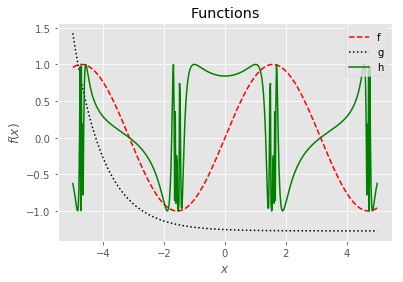

In [19]:
from numpy import exp, sin, tan  # avoid np. prefix in f(x), g(x) and h(x)

def f(x):
    return sin (x)

def g(x):
    return (1 / exp(x) - 70) / 55

def h(x):
    return sin ((tan(x))/x)

x = np.linspace(-5, 5, 500)
plt.figure()
plt.plot(x, f(x), 'r--', x, g(x), 'k:', x, h(x), 'g-')
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.title('Functions')
plt.legend(['f', 'g', 'h'])
plt.savefig('functions.pdf')
#plt.show()